In [1]:
#Load packages

from netCDF4 import Dataset
import numpy as np
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import sys
import netCDF4 as nc4

sys.path.append("/home2/datahome/tpicard/python/Python_Modules_p3_pyticles/")

from Modules import *
from Modules_gula import *

nc = nc4.Dataset('/home2/datawork/tpicard/Pyticles/OUTPUTS/PDF/pdf_vertical_level_dt_50.nc','r')
pdf = np.asfortranarray(nc.variables['pdf'])
nc.close()

In [2]:
pdf.shape

(108, 9, 1, 50, 50)

<ipython-input-16-52d89b2dc733>:15: UserWarning: Log scale: values of z <= 0 have been masked
  ctf = ax.contourf(0.5*(xband[:-1]+xband[1:]), 0.5*(yband[:-1]+yband[1:]), jpdf.T*100,  levels, norm=norm, cmap=cmap, extend='both')


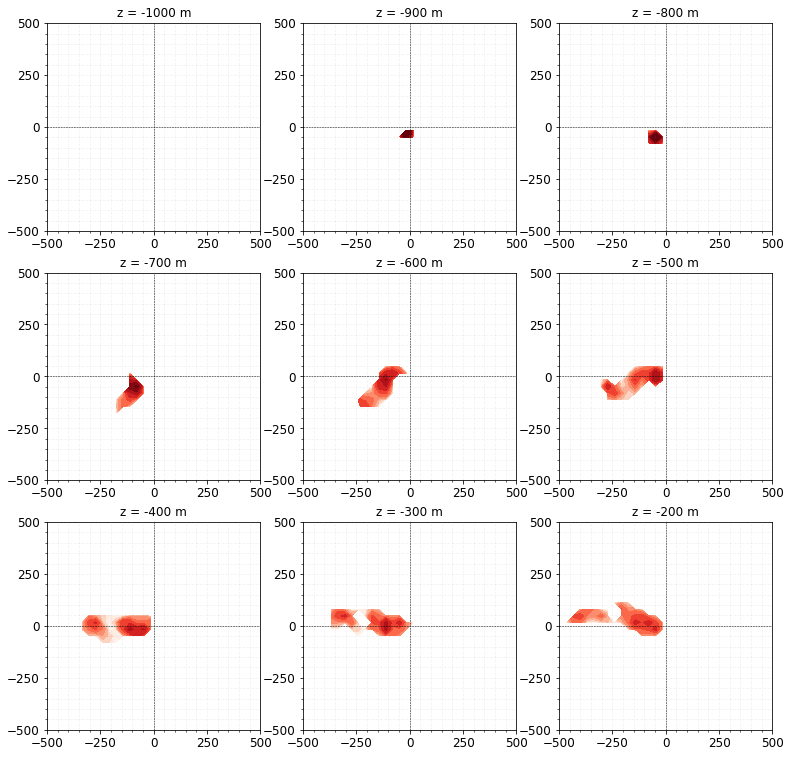

In [16]:
%matplotlib inline

list_level = [1000,900,800,700,600,500,400,300,200]
fig = plt.figure(figsize=(13,13))

for n in range(9):

    ax = fig.add_subplot(3,3,n+1)
    cmap = 'Spectral_r'
    cmap = 'Reds'
    xband, yband = np.linspace(-800,800,51), np.linspace(-800,800,51)
    jpdf = pdf[20,n,0,:,:]
    levels=np.logspace(-3, -1, 10)
    norm= colors.LogNorm(vmin=1e-3, vmax=1e-1)
    ctf = ax.contourf(0.5*(xband[:-1]+xband[1:]), 0.5*(yband[:-1]+yband[1:]), jpdf.T*100,  levels, norm=norm, cmap=cmap, extend='both')
    #cb = fig.colorbar(ctf, ax=ax)
    #cb.set_ticks([1e-5, 1e-4])
    #cb.set_label('[km' + r'$^{-2}$' + ']', fontsize=16, rotation=270)
    ax.set_xlim([-500,500])
    ax.set_ylim([-500,500])

    plt.axvline(x=0,color='black',linestyle='--',linewidth=0.5)
    plt.axhline(y=0,color='black',linestyle='--',linewidth=0.5)
    plt.xticks([-500,-250,0,250,500])
    plt.yticks([-500,-250,0,250,500])
    #plt.text(600,600,'[km' + r'$^{-2}$' + ']', fontsize=16)
    #plt.xlabel('[km]', fontsize=20)
    #plt.ylabel('[km]', fontsize=20)
    #plt.text(-650,600,'[km]', fontsize=20)
    #plt.text(600,-600,'[km]', fontsize=20)
    #plt.text(-600, 650, '(' + label[i] + ')', fontsize=20)
    plt.tick_params(labelsize=12)
    plt.grid(b=True, which='major', color='gray', linestyle='--',alpha=0.1)
    plt.grid(b=True, which='minor', color='gray', linestyle='--',alpha=0.1)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    plt.title('z = {0} m'.format(-list_level[n]), fontsize=12)

In [32]:
def concate_pdf():
    
    nc = nc4.Dataset('/home2/datawork/tpicard/Pyticles/OUTPUTS/PDF/pdf_vertical_level_dt_{0}.nc'.format(7),'r')
    pdf = np.asfortranarray(nc.variables['pdf'])
    nc.close()
    
    for dt in range(8,57,1):
        nc = nc4.Dataset('/home2/datawork/tpicard/Pyticles/OUTPUTS/PDF/pdf_vertical_level_dt_{0}.nc'.format(dt),'r')
        pdf = np.concatenate((pdf,np.asfortranarray(nc.variables['pdf'])),axis = 0)
        nc.close()

    return(pdf)

In [18]:
# Take all pdf for a 101 days period
def read_data(dt):
    datetime=dt*101
    nc = nc4.Dataset('/home2/datawork/tpicard/Pyticles/CNN_DATA/trainning_database_{0:06}.nc'.format(datetime),'r')
    inputs = np.nan_to_num(np.asfortranarray(nc.variables['inputs']))
    inputs= np.transpose(inputs, axes=[0,3,1,2])
    nc.close()
    return(inputs)

In [22]:
def concate_inputs():
    
    dt = 7
    inputs = read_data(dt)[:,:,::4,::4]
    
    for dt in range(8,57,1):
        print('dt = {0}'.format(dt))
        datetime = 101*dt
        inputs_dt = read_data(dt)[:,:,::4,::4]
        inputs = np.concatenate((inputs,inputs_dt),axis = 0)
        
    return(inputs)

In [23]:
inputs = concate_inputs()
print(inputs.shape)

dt = 8
dt = 9
dt = 10
dt = 11
dt = 12
dt = 13
dt = 14
dt = 15
dt = 16
dt = 17
dt = 18
dt = 19
dt = 20
dt = 21
dt = 22
dt = 23
dt = 24
dt = 25
dt = 26
dt = 27
dt = 28
dt = 29
dt = 30
dt = 31
dt = 32
dt = 33
dt = 34
dt = 35
dt = 36
dt = 37
dt = 38
dt = 39
dt = 40
dt = 41
dt = 42
dt = 43
dt = 44
dt = 45
dt = 46
dt = 47
dt = 48
dt = 49
dt = 50
dt = 51
dt = 52
dt = 53
dt = 54
dt = 55
dt = 56
(5400, 52, 100, 100)


In [34]:
pdf = concate_pdf()
print(pdf.shape)

(5400, 9, 1, 50, 50)


In [24]:
list_index = np.linspace(0,5399,5400).astype(int)
index_test = np.random.choice(list_index, size=500, replace=False)

In [26]:

#pdf_test = pdf[index_test,:,:,:,:]
#pdf_train = np.delete(pdf,index_test,axis=0)
inputs_test = inputs[index_test,:,:,:]
inputs_train = np.delete(inputs,index_test,axis=0)
#print(pdf_test.shape,pdf_train.shape,inputs_test.shape,inputs_train.shape)
print(inputs_test.shape,inputs_train.shape)

NameError: name 'pdf_test' is not defined

In [35]:
pdf_test = pdf[index_test,:,:,:,:]
pdf_train = np.delete(pdf,index_test,axis=0)

In [27]:
print(inputs_test.shape,inputs_train.shape)

(500, 52, 100, 100) (4900, 52, 100, 100)


In [31]:
nc_name = 'Inputs_vertical_levels.nc'

#creating the file
nc = nc4.Dataset('/home2/datawork/tpicard/Pyticles/CNN_DATA/{0}'.format(nc_name),'w')

#Dimensions used
nc.createDimension('nb_sample', 5400)
nc.createDimension('nb_sample_train', 4900)
nc.createDimension('nb_sample_test', 500)
nc.createDimension('xyres', 100)
nc.createDimension('channel', 52)

#Variables used
nc.createVariable('inputs', 'f4', ('nb_sample','channel','xyres', 'xyres'))
nc.createVariable('inputs_test', 'f4', ('nb_sample_test','channel','xyres', 'xyres'))
nc.createVariable('inputs_train', 'f4', ('nb_sample_train','channel','xyres', 'xyres'))
nc.variables['inputs'][:] = inputs
nc.variables['inputs_test'][:] = inputs_test
nc.variables['inputs_train'][:] = inputs_train

nc.close()

In [37]:
nc_name = 'pdf_vertical_levels.nc'

#creating the file
nc = nc4.Dataset('/home2/datawork/tpicard/Pyticles/OUTPUTS/PDF/{0}'.format(nc_name),'w')

#Dimensions used
nc.createDimension('nb_sample', 5400)
nc.createDimension('nb_sample_train', 4900)
nc.createDimension('nb_sample_test', 500)
nc.createDimension('pdfsize', 50)
nc.createDimension('zdim', 9)
nc.createDimension('channel', 1)

#Variables used
nc.createVariable('pdf', 'f4', ('nb_sample','zdim','channel','pdfsize', 'pdfsize'))
nc.createVariable('pdf_test', 'f4', ('nb_sample_test','zdim','channel','pdfsize', 'pdfsize'))
nc.createVariable('pdf_train', 'f4', ('nb_sample_train','zdim','channel','pdfsize', 'pdfsize'))
nc.variables['pdf'][:] = pdf
nc.variables['pdf_test'][:] = pdf_test
nc.variables['pdf_train'][:] = pdf_train

nc.close()

In [5]:
#creating the file
nc_name = 'pdf_vertical_levels.nc'
nc = nc4.Dataset('/home2/datawork/tpicard/Pyticles/OUTPUTS/PDF/{0}'.format(nc_name),'r')
pdf_test = np.asfortranarray(nc.variables['pdf_test'])
nc.close()

nc_name = 'Inputs_vertical_levels.nc'
nc = nc4.Dataset('/home2/datawork/tpicard/Pyticles/CNN_DATA/{0}'.format(nc_name),'r')
inputs_test = np.asfortranarray(nc.variables['inputs_test'])
nc.close()

In [6]:
pdf_test.shape

(500, 9, 1, 50, 50)

In [7]:
inputs_test.shape

(500, 52, 100, 100)

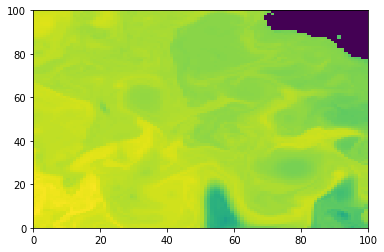

In [8]:
plt.pcolormesh(inputs_test[0,0,:,:])

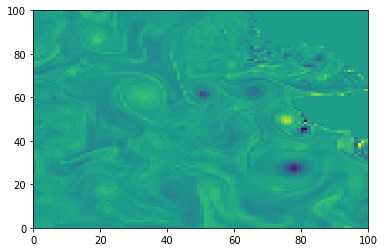

In [14]:
plt.pcolormesh(inputs_test[0,20,:,:])